In [1]:
import matplotlib.pyplot as plt ### plotting things
import numpy as np ## one of python's main maths packages
import pandas as pd ## for reading in our data
from scipy.optimize import curve_fit ## for fitting a line to our data
import matplotlib.ticker as ticker ## this one lets us change some parameters in our plots.
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
from IPython.display import display, Markdown
plt.rcParams.update({'font.size':15})   # A decent font size so the text is readible. 
from IPython.display import display, Markdown

In [2]:
#uncertainties
d_R_e = 0.01e-3/2 # Radius of the wire ±0.01mm
d_r_e = 5e-3 #distance form magnet ±5mm
mu_e = 1.2566e-6 #permeability of free space
d_r_coil = 1e-3/2 #±1mm
d_N = 20 #±20 

#4 pi mu = 10^-7

In [3]:
#constants
R_e = 0.32e-3/2 # Radius of the wire ±0.01mm
r_e = 55e-3 #distance form magnet ±5mm
mu_e = 1.2566e-6 #permeability of free space
r_coil = 13e-3/2 #±1mm
N = 1400 #±20 

gradient = 0.032592670299758916 +/- 0.004299953117631433
intercept = 0.007186072447249745 +/- 0.004905126980277765
162963.3514987946
1985.5565162325645


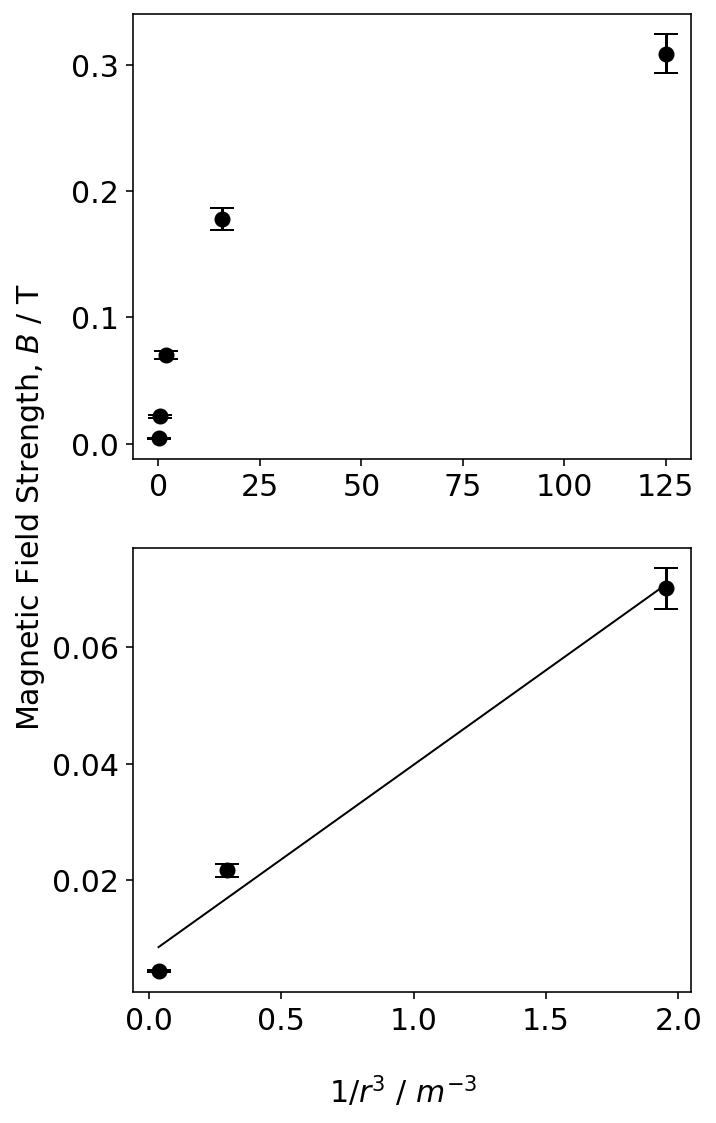

In [7]:
#doesn't use extra values
bfield2 = pd.read_excel('/Users/isabella/Desktop/LabGas/bfield.xlsx', names=('r', 'inverse_r', 'B', 'error'))

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(5, 9))

fig.text(0.5, 0.04, '$ 1/r^{3} \ / \  m^{-3} $', ha='center')
fig.text(-0.04, 0.5, 'Magnetic Field Strength, $B$ / T', va='center', rotation='vertical')

ax1 = plt.subplot(2, 1, 1)

#plt.rcParams['figure.figsize'] = [5, 9]
plt.subplots_adjust(wspace=0.5)
params = {'mathtext.default': 'regular' }
plt.rcParams.update({'font.size':15})



ax1.plot(bfield2.inverse_r[1:6]*10**-6, bfield2.B[1:6], 'o')
ax1.errorbar(bfield2.inverse_r[1:6]*10**-6, bfield2.B[1:6], 
             yerr = bfield2.error[1:6],
             marker ='o',             
             markersize = 7,        
             color ='black',          
             linestyle ='none',       
             capsize = 6)
#plt.xlabel('$ 1/r^{3} \ / \  m^{-3} $')
#plt.ylabel('Magnetic Field Strength, $B$ / T')


ax2= plt.subplot(2,1,2)
plt.rcParams.update({'font.size':15}) 
ax2.plot(bfield2.inverse_r[3:6]*10**-6, bfield2.B[3:6], 'o')

def func(x, m, c):
    return m * x + c

popt2, pcov2 = curve_fit(func, bfield2.inverse_r[3:6]*10**-6, bfield2.B[3:6])

yfit = func(bfield2.inverse_r[3:6]*10**-6, *popt2)

ax2.plot(bfield2.inverse_r[3:6]*10**-6, yfit, color = 'black', linewidth=1) 

ax2.errorbar(bfield2.inverse_r[3:6]*10**-6, bfield2.B[3:6], 
             yerr = bfield2.error[3:6],
             marker ='o',             
             markersize = 7,        
             color ='black',          
             linestyle ='none',       
             capsize = 6)
#plt.xlabel('$ 1/r^{3} \ / \ $ Mm$^{-3} $')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))





print("gradient =", popt2[0], "+/-", pcov2[0,0]**0.5)
print("intercept =", popt2[1], "+/-", pcov2[1,1]**0.5)

m2 = popt2[0]/ 2e-7
print(m2)
d_m2 = pcov2[0,0]**0.5 / 2e-7
emf_constant2= (3*N* r_coil**2 * mu_e * m2)/ (2 * r_e**4)
print(emf_constant2)

#plt.ylabel('Magnetic Field Strength, $B$ / T')

plt.savefig('emf', dpi=300)
plt.show()
#it is more linear for an inverse squared relationship

In [10]:

c = 3* mu_e / 2
d_term1 = (r_coil**2 *c*m2**d_N)/(r_e**4)
d_term2 = (2*N*r_coil*c*m2*d_r_coil)/ (r_e**4)
d_term3 = (r_coil**2 * N *c*d_m2)/ (r_e**4)
d_term4 = (-r_coil**2 *N *c* m2*4*d_r_e)/(r_e**5)
d_emf_constant2 = np.sqrt(d_term1**2 + d_term2**2 + d_term3**2 + d_term4**2)


print(m2*10e-7, "±", d_m2*10e-7)
print(emf_constant2,"±", d_emf_constant2)

0.1629633514987946 ± 0.021499765588157166
1985.5565162325645 ± 1.5186693398415215e+99


gradient = -2.120157868803064 +/- 0.13246278778786869
intercept = 1.8053474935805371 +/- 0.3685684803973572


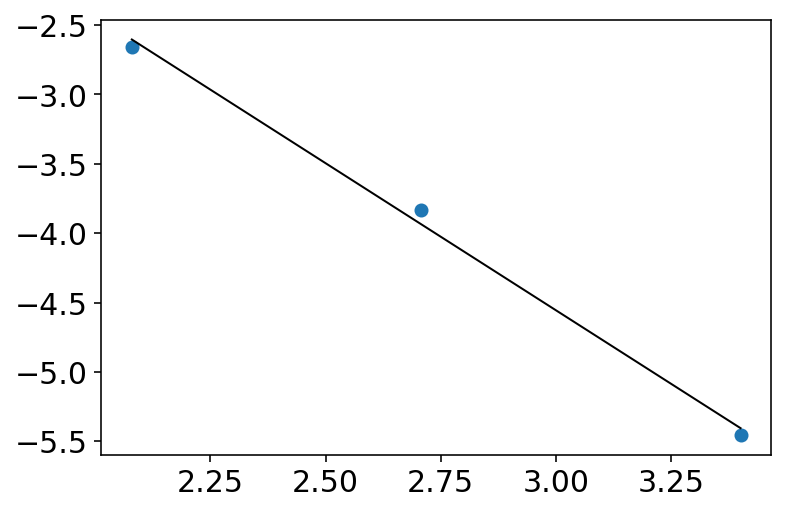

In [7]:
#log log plot to find power of r
bfield = pd.read_excel('/Users/isabella/Desktop/LabGas/bfield.xlsx', names=('r', 'inverse_r', 'B', 'error'))
#B = [i *10e-3 for i in bfield.B]
#inverse_r = [1/((i*10e-3)**3) for i in bfield.r]

#ignore first two points - gradient approaches 3 as it should 
plt.plot(np.log(bfield.r[3:6]), np.log(bfield.B[3:6]), 'o')


def func(x, m, c):
    return m * x + c
popt2, pcov2 = curve_fit(func, np.log(bfield.r[3:6]), np.log(bfield.B[3:6]))
yfit = func(np.log(bfield.r[3:6]), *popt2)
plt.plot(np.log(bfield.r[3:6]), yfit, color = 'black', linewidth=1) 

print("gradient =", popt2[0], "+/-", pcov2[0,0]**0.5)
print("intercept =", popt2[1], "+/-", pcov2[1,1]**0.5)

